# 3. Multiple trees on MNIST

In python use the following two functions:

    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    
Using the mnist dataset split the data into 50,000 training, 10000 validation, 10000 test.

In [66]:
import numpy as np 
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import time

#### (a) 
With the function `RandomForestClassifier` experiment with various stopping rules <br>
`min_samples_split`: minimum number of samples in node to allow it to split.<br>
`max_features`: number of random features from which to select the best<br>
`n_estimators`: number of trees. Also use the option criterion="entropy"

Setting up the classifier is done with this command:<br>
`clf = RandomForestClassifier(n_estimators=num_trees,
       min_samples_split=...,criterion="entropy",
max_features=...)`

Then you can call the functions `clf.fit`, `clf.predict`, and `clf.predict proba` - which gives the output average probabilities.

Plot error rates on both training and validation data as a function of the number of trees. Once you have found the best protocol check it on the test set.


In [50]:
data=np.float64(np.load('/project2/cmsc25025/mnist/MNIST.npy'))
labels=np.float32(np.load('/project2/cmsc25025/mnist/MNIST_labels.npy'))

def getDataRange(data, l, r):
    return data[int(l*len(data)):int(r*len(data))]

train_data = getDataRange(data, 0, 0.7)
valid_data = getDataRange(data, 0.7, 0.85)
test_data = getDataRange(data, 0.85, 1)

train_labels = getDataRange(labels, 0, 0.7)
valid_labels = getDataRange(labels, 0.7, 0.85)
test_labels = getDataRange(labels, 0.85, 1)

In [54]:
mss = 5
mf = 10
nts = [1,2,4,6,8,10,12,14,16,18,20]
valid_errors = []
train_errors = []
train_time = []
for nt in nts:
    clf = RandomForestClassifier(n_estimators=nt, min_samples_split=mss, 
                                 criterion="entropy",max_features=mf)
    t1 = time.time()
    clf.fit(train_data, train_labels)
    t2 = time.time()
    train_pred = clf.predict(train_data)
    train_time.append(t2-t1)
    train_errors.append(np.mean(train_pred != train_labels))
    clf.predict_proba(valid_data)
    valid_pred = clf.predict(valid_data)
    valid_errors.append(np.mean(valid_pred != valid_labels))


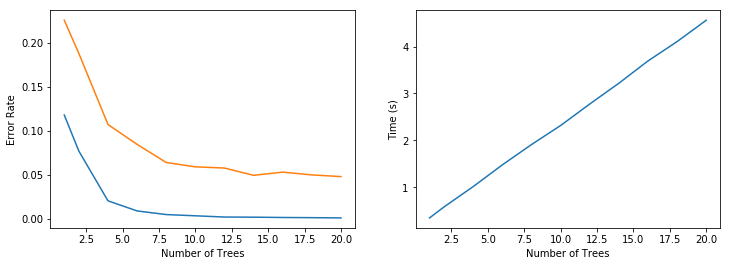

In [72]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(nts, train_errors)
plt.plot(nts,valid_errors)
# plt.legend(np.array(['Training Errors', 'Validation Error']))
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')
plt.subplot(1, 2, 2)
plt.plot(nts, train_time)
plt.xlabel('Number of Trees')
plt.ylabel('Time (s)')
plt.show()


Note that the blue line is the training error and the orange line is the validation error. The error rate for both go down at a decreasing rate as the number of trees increases. This is expected as there are decreasing marginal returns to adding a tree. The error rate starts to flatten out very quickly. The runtime increases at a constant rate as the number of trees increases. Again, this is expected as the cost to adding a tree is constant as you have to train the whole tree. Thus, these results make sense.

In [125]:
mss = 5
nt = 5
mfs = [1,5,10,15,20,25,30,35,40,50,100]
mf_valid_errors = []
mf_train_errors = []
mf_train_time = []
for mf in mfs:
    clf = RandomForestClassifier(n_estimators=nt, min_samples_split=mss, 
                                 criterion="entropy",max_features=mf)
    t1 = time.time()
    clf.fit(train_data, train_labels)
    t2 = time.time()
    train_pred = clf.predict(train_data)
    mf_train_time.append(t2-t1)
    mf_train_errors.append(np.mean(train_pred != train_labels))
    clf.predict_proba(valid_data)
    valid_pred = clf.predict(valid_data)
    mf_valid_errors.append(np.mean(valid_pred != valid_labels))


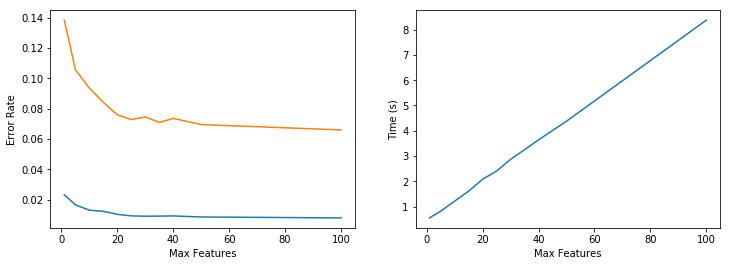

In [126]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(mfs, mf_train_errors)
plt.plot(mfs,mf_valid_errors)
# plt.legend(np.array(['Training Errors', 'Validation Error']))
plt.xlabel('Max Features')
plt.ylabel('Error Rate')
plt.subplot(1, 2, 2)
plt.plot(mfs, mf_train_time)
plt.xlabel('Max Features')
plt.ylabel('Time (s)')
plt.show()


The results here are extremely similar to the results for adding trees, Again, these makes sense as there are decreasing marginal returns to adding more max features. Also, the time to compute each additional feature is the same as the time for the feature before it, so the runtime increases linearly. If we were to reach the maximum amount of features then we would see the graph flatten out, but an image has way too many features to look at.

In [129]:
nt = 5
mf = 10
msss = [2,4,6,8,10,12,16,20]
mss_valid_errors = []
mss_train_errors = []
mss_train_time = []
for mss in msss:
    clf = RandomForestClassifier(n_estimators=nt, min_samples_split=mss, 
                                 criterion="entropy",max_features=mf)
    t1 = time.time()
    clf.fit(train_data, train_labels)
    t2 = time.time()
    train_pred = clf.predict(train_data)
    mss_train_time.append(t2-t1)
    mss_train_errors.append(np.mean(train_pred != train_labels))
    clf.predict_proba(valid_data)
    valid_pred = clf.predict(valid_data)
    mss_valid_errors.append(np.mean(valid_pred != valid_labels))


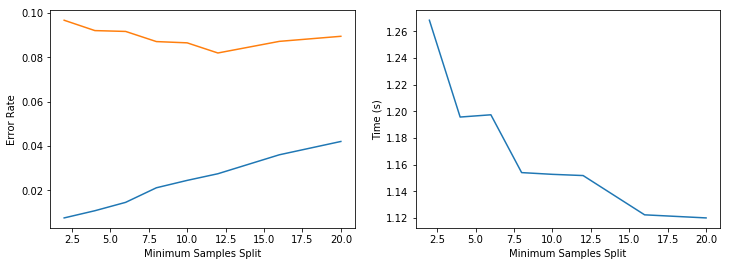

In [130]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(msss, mss_train_errors)
plt.plot(msss,mss_valid_errors)
# plt.legend(np.array(['Training Errors', 'Validation Error']))
plt.xlabel('Minimum Samples Split')
plt.ylabel('Error Rate')
plt.subplot(1, 2, 2)
plt.plot(msss, mss_train_time)
plt.xlabel('Minimum Samples Split')
plt.ylabel('Time (s)')
plt.show()


The minimum samples split has a fairly constant error rate for the validation data, but an increasing one for the training data. This makes sense as minimum sample split has a very small effect because our data set is so small. It is likely in most cases that the max features stop condition gets hit before this one. Also, the only time that minimum sample split has a storng effect is when it is differentiating between a few very specific cases that are not nesisarily represented in the validiation or testing data set. The runtime decreases as minimum samples split increases and plateaus in some cases as it only decreaeses runtime when the increase in minimum sample split causes a stop condition to get hit earlier.

### Now, I will chose and run the random forest on the optimum parameters.

I will choice a max features of 50 the higher the max features, the better the trees performed. This makes sense as allowing for more features makes the stop condition harder to reach and thus the model will be more complex and perform better. I found that the increase after 50 is not worth the cost in runtime. The error rate was lowest with a lower minimum samples split, which can be a minimum at 2, so I will use a minimum sample split of 2. This also makes sense as it prolongs the stop condition, so it will allow the model to be more complex and thus more accurate. I will chose 20 trees as the error rate decreases with adding trees. Adding trees evidently should decrease the error rate. I found that the decrease in error rate has flattened around this point though and thus will use 20 trees.

In [135]:
bmss = 2
bmf = 50
bnt = 20
clf = RandomForestClassifier(n_estimators=bnt, min_samples_split=bmss, 
                             criterion="entropy",max_features=bmf)
t1 = time.time()
clf.fit(train_data, train_labels)
t2 = time.time()
train_pred = clf.predict(train_data)
train_time = t2-t1
train_error = np.mean(train_pred != train_labels)
clf.predict_proba(valid_data)
valid_pred = clf.predict(valid_data)
valid_error = np.mean(valid_pred != valid_labels)
clf.predict_proba(test_data)
test_pred = clf.predict(test_data)
test_error = np.mean(test_pred != test_labels)

In [136]:
print("The training error rate is",train_error)
print("The validation error rate is",valid_error)
print("The testing error rate is", test_error)
print("The runtime is", train_time)

The training error rate is 0.00014285714285714287
The validation error rate is 0.04247619047619047
The testing error rate is 0.03638095238095238
The runtime is 17.62465786933899


The best test protocal was having 20 trees, which was the max I tested, 40 max-features, which is also the max I tested and a minimum sample split of 2. These are the results that gave me the best error rate on the data. The results are extremely good and thus I think I made a good choice with these parameters. The biggest issue is the longish runtime of ~14 seconds, but this is not that long in the grand scheme of things and is worth the extemely low error rate.

#### (b)  
The function `AdaBoostClassifier` implements SAMME, the boosting protocol described in problem 1. You define a classifier `clfb` (for example `RandomForestClassifier` with 1 tree), and pass it on to the function

`AdaBoostClassifier(clfb,n_estimators=...,algorithm=’SAMME’)`

Experiment with the same three parameters in this setting (stopping rule and number of splits in the definition of `clfb`) and number of trees. Compare the results to the random forest results in part (a).

In [137]:
mss = 5
mf = 10
cnt = 1
nts = [1,2,4,6,8,10,12,14,16,18,19, 20]
bvalid_errors = []
btrain_errors = []
btrain_time = []
for nt in nts:
    clfb = RandomForestClassifier(n_estimators=cnt, min_samples_split=mss, 
                                 criterion="entropy",max_features=mf)
    clf = AdaBoostClassifier(clfb,n_estimators=nt,algorithm='SAMME')
    t1 = time.time()
    clf.fit(train_data, train_labels)
    t2 = time.time()
    train_pred = clf.predict(train_data)
    btrain_time.append(t2-t1)
    btrain_errors.append(np.mean(train_pred != train_labels))
    clf.predict_proba(valid_data)
    valid_pred = clf.predict(valid_data)
    bvalid_errors.append(np.mean(valid_pred != valid_labels))


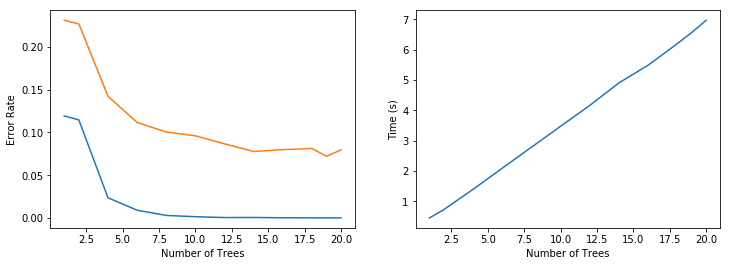

In [138]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(nts, btrain_errors)
plt.plot(nts,bvalid_errors)
# plt.legend(np.array(['Training Errors', 'Validation Error']))
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')
plt.subplot(1, 2, 2)
plt.plot(nts, btrain_time)
plt.xlabel('Number of Trees')
plt.ylabel('Time (s)')
plt.show()


In [131]:
mss = 5
mfs = [1,5,10,15,20,25,30,35,40, 50, 100]
cnt = 1
nt = 5
bmf_valid_errors = []
bmf_train_errors = []
bmf_train_time = []
for mf in mfs:
    clfb = RandomForestClassifier(n_estimators=cnt, min_samples_split=mss, 
                                 criterion="entropy",max_features=mf)
    clf = AdaBoostClassifier(clfb,n_estimators=nt,algorithm='SAMME')
    t1 = time.time()
    clf.fit(train_data, train_labels)
    t2 = time.time()
    train_pred = clf.predict(train_data)
    bmf_train_time.append(t2-t1)
    bmf_train_errors.append(np.mean(train_pred != train_labels))
    clf.predict_proba(valid_data)
    valid_pred = clf.predict(valid_data)
    bmf_valid_errors.append(np.mean(valid_pred != valid_labels))


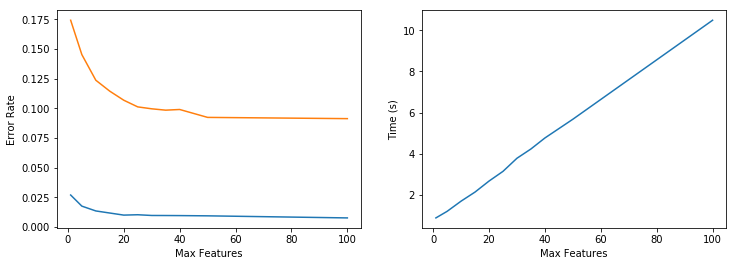

In [132]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(mfs, bmf_train_errors)
plt.plot(mfs,bmf_valid_errors)
# plt.legend(np.array(['Training Errors', 'Validation Error']))
plt.xlabel('Max Features')
plt.ylabel('Error Rate')
plt.subplot(1, 2, 2)
plt.plot(mfs, bmf_train_time)
plt.xlabel('Max Features')
plt.ylabel('Time (s)')
plt.show()


In [102]:
msss = [2,4,6,8,10,12,16,20]
mfs = 10
cnt = 1
nt = 5
bmss_valid_errors = []
bmss_train_errors = []
bmss_train_time = []
for mss in msss:
    clfb = RandomForestClassifier(n_estimators=cnt, min_samples_split=mss, 
                                 criterion="entropy",max_features=mf)
    clf = AdaBoostClassifier(clfb,n_estimators=nt,algorithm='SAMME')
    t1 = time.time()
    clf.fit(train_data, train_labels)
    t2 = time.time()
    train_pred = clf.predict(train_data)
    bmss_train_time.append(t2-t1)
    bmss_train_errors.append(np.mean(train_pred != train_labels))
    clf.predict_proba(valid_data)
    valid_pred = clf.predict(valid_data)
    bmss_valid_errors.append(np.mean(valid_pred != valid_labels))


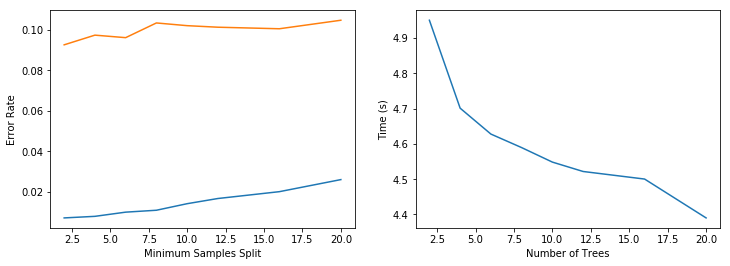

In [103]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(msss, bmss_train_errors)
plt.plot(msss,bmss_valid_errors)
# plt.legend(np.array(['Training Errors', 'Validation Error']))
plt.xlabel('Minimum Samples Split')
plt.ylabel('Error Rate')
plt.subplot(1, 2, 2)
plt.plot(msss, bmss_train_time)
plt.xlabel('Minimum Samples Split')
plt.ylabel('Time (s)')
plt.show()


The results for all three parameters follow a very similar trend that that of part (a). This is expected as changing the parameters should affect the booster in the same fashion as in the original random forest tree.

### Now, I will chose and run the random forest on the optimum parameters.

I will use the same optimum paramters I used in (a) for the same reasons except only 19 trees instead of 20 as for some reason there was an increase in error with the addition of a 20th tree. Perhaps because there is also 1 addition tree in the `RandomForestClassifierModel`.

In [139]:
bmss = 2
bmf = 50
cnt = 1
bnt = 19
clfb = RandomForestClassifier(n_estimators=cnt, min_samples_split=bmss, 
                             criterion="entropy",max_features=bmf)
clf = AdaBoostClassifier(clfb,n_estimators=bnt,algorithm='SAMME')
t1 = time.time()
clf.fit(train_data, train_labels)
t2 = time.time()
train_pred = clf.predict(train_data)
b_train_time = t2-t1
b_train_error = np.mean(train_pred != train_labels)
clf.predict_proba(valid_data)
valid_pred = clf.predict(valid_data)
b_valid_error = np.mean(valid_pred != valid_labels)
clf.predict_proba(train_data)
test_pred = clf.predict(test_data)
b_test_error = np.mean(test_pred != test_labels)

In [140]:
print("The training error rate is",b_train_error)
print("The validation error rate is",b_valid_error)
print("The testing error rate is", b_test_error)
print("The runtime is", b_train_time)

The training error rate is 2.0408163265306123e-05
The validation error rate is 0.05819047619047619
The testing error rate is 0.056
The runtime is 22.40265154838562


I found the results for using a booster extremelty similar to the original method. This is expected as we proved in 1c that both methods change the weights at the same pace. Thus, they should have extremely similar results, which they do. It is definitely interesting to see this in effect though. The boosting model performed very slightly worse on the validation and testing set, but performed slightly better on the training set. It however also take several seconds longer. Overall, these are similar models that produce similar results.